In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats
pd.pandas.set_option('display.max_columns',None)

# PART-A ( Concept Based)

In [2]:
bmi = [17.5, 18.0, 36.8, 31.7, 31.7,
17.3, 24.3, 47.7, 38.5, 17.0,
23.7 ,16.5, 25.1, 17.4, 18.0,
37.6 ,19.7 ,21.4, 28.6, 21.6,
19.3 ,20.0, 16.9, 25.2, 19.8,
25.0, 17.2 ,20.4, 20.1, 29.1,
19.1, 25.2, 23.2, 25.9, 24.0,
41.7, 24.0, 16.8, 26.8, 31.4,
16.9, 17.2, 24.1, 35.2, 19.1,
22.9, 18.2, 25.4, 35.4, 25.5]

Q1. Compute the mean, median and the mode of the data

In [3]:
mean = np.mean(bmi)
median = np.median(bmi)
mode = pd.Series(bmi).mode()
print(f'''mean ={mean:.2f}
medain = {median:.2f}
mode = {mode} ''')

mean =24.42
medain = 23.45
mode = 0    16.9
1    17.2
2    18.0
3    19.1
4    24.0
5    25.2
6    31.7
dtype: float64 


Q2. Compute the range , variance and standard deviation of BMI

In [4]:
range1 = min(bmi),max(bmi)
variance = np.var(bmi)
std = np.std(bmi)
print(f'''range ={range1}
variance = {variance}
standard deviation = {std} ''')

range =(16.5, 47.7)
variance = 53.469716000000005
standard deviation = 7.312298954501245 


Q3. Find the mean deviation for the data . The mean deviation is defined as
below.


In [5]:
md = 0
for i in bmi:
    md +=  i -  np.mean(bmi)
print(f'mean deviation = {md}')

mean deviation = 1.5276668818842154e-13


Q4. Calculate the Pearson coefficient of skewness and comment on the
skewness of the data

skew = 0.39878019459324565


<Axes: ylabel='Density'>

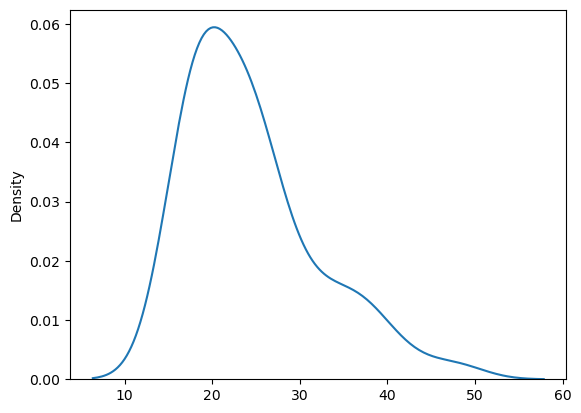

In [6]:
sk = (3*(mean - median))/std
print(f'skew = {sk}')
sns.kdeplot(bmi)

The data seems to be positively (right) skewed

Q5. Count the number of data values that fall within one standard deviation of
the mean. Compare this with the answer from Chebyshev’s Theorem.

In [7]:
bmi = pd.Series(bmi)
upper_lt  = mean + std
lower_lt  = mean - std
count = 0
for i in bmi:
    if i > upper_lt or i < lower_lt:
        count+=1
print(f'No. of values within one standad deviation = {count}')


No. of values within one standad deviation = 12


* Chebyshev's inequality, which states that for any dataset, at least (1 - 1/k**2) of the data values fall within k standard deviations of the mean.
* The lower bound by Chebyshev's Theorem whith k = 1 is 0, meaning that at least 0% of the data falls within one standard deviation of the mean.
* Since the count we obtained is greater than 0, it is evident that the result from calculating the data values within one standard deviation of the mean aligns with Chebyshev's Theorem.

Q6. Find the three quartiles and the interquartile range (IQR).

In [8]:
bmi = pd.Series(bmi)
q1 = bmi.quantile(0.25)
q2 = bmi.quantile(0.5)
q3 = bmi.quantile(0.75)
iqr = q3 - q1
print(f'''IQR = {iqr}
q1 = {q1}
q2 = {q2}
q3 = {q3}''')

IQR = 8.149999999999999
q1 = 18.425
q2 = 23.45
q3 = 26.575


Q7. Are there any outliers in the data set ?


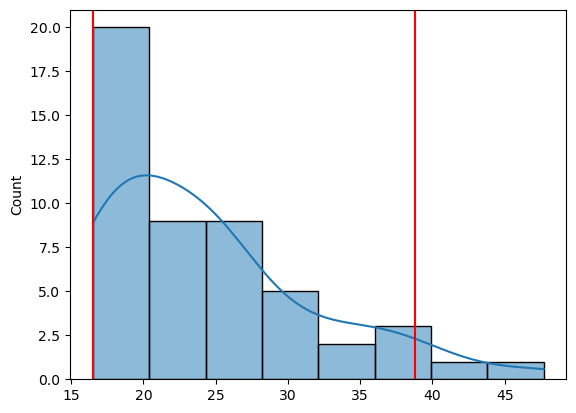

In [9]:
uwf = q3 + (1.5 * iqr) if max(bmi) > q3 + (1.5 * iqr) else max(bmi)
lwf = q1 - (1.5 * iqr) if min(bmi) < q1 - (1.5 * iqr) else min(bmi)
sns.histplot(bmi,kde=True)
plt.axvline(uwf,color = 'red')
plt.axvline(lwf,color = 'red')
plt.show()

In [10]:
outliers = []
for i in bmi:
    if i > uwf:
        outliers.append(i)
print(f'The outliers are {outliers}')

The outliers are [47.7, 41.7]


Q8. Draw a boxplot of the dataset to confirm .

<Axes: >

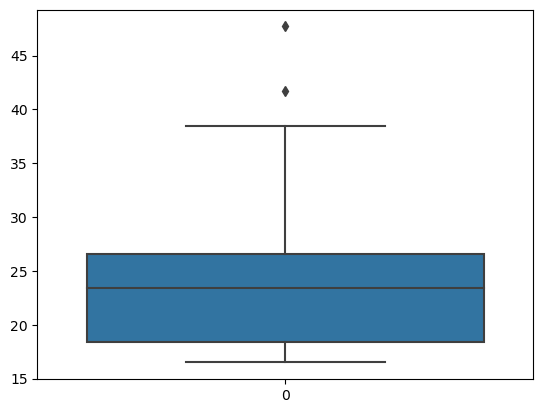

In [11]:
sns.boxplot(bmi)

Q9. Find the percentile rank of the datapoint 25.0.

In [12]:
p_rank = np.percentile(bmi,25)
print(f'The percentile rank of the datapoint 25.0 = {p_rank}')

The percentile rank of the datapoint 25.0 = 18.425


Q10. What is the probability that a young adult has a BMI above 25.0?


In [13]:
count = 0
for i in bmi:
    if i > 25:
        count+=1
p = count / len(bmi)
print(f'There is a {p*100}% chance that a young adult has a BMI above 25.0 ')

There is a 38.0% chance that a young adult has a BMI above 25.0 


Q11. Create a frequency distribution for the data and visualize it appropriately

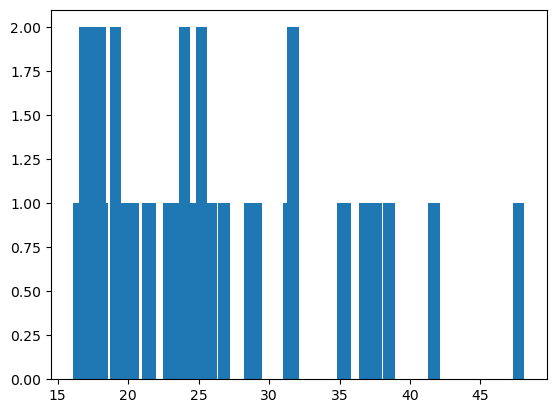

In [14]:
freq_dist = bmi.value_counts()
plt.bar(x = freq_dist.index,height=freq_dist)
plt.show()

Q13. What is the shape of the distribution of this dataset? Create an
appropriate graph to determine that. Take 100 random samples with
replacement from this dataset of size 5 each. Create a sampling distribution of
the mean age of customers. Compare with other sampling distributions of
sample size 10, 15, 20, 25, 30. State your observations. Does it corroborate
the Central Limit Theorem?

<Axes: ylabel='Density'>

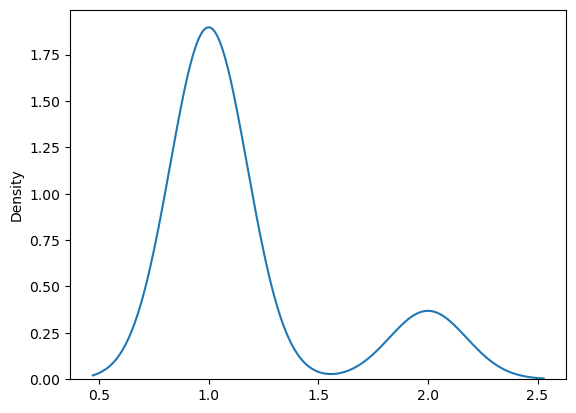

In [15]:
sns.kdeplot(freq_dist)

In [16]:
samp1 = []
for i in range(100):
    samp1.append(np.random.choice(bmi, size=5).mean())
stats.shapiro(samp1)

ShapiroResult(statistic=0.9617656469345093, pvalue=0.005384025629609823)

In [17]:
samp2 = []
for i in range(100):
    samp2.append(np.random.choice(bmi, size=10).mean())
stats.shapiro(samp2)

ShapiroResult(statistic=0.9701923131942749, pvalue=0.02286727912724018)

In [18]:
samp3 = []
for i in range(100):
    samp3.append(np.random.choice(bmi, size=15).mean())
stats.shapiro(samp3)

ShapiroResult(statistic=0.989990770816803, pvalue=0.6638486385345459)

In [19]:
samp4 = []
for i in range(100):
    samp4.append(np.random.choice(bmi, size=20).mean())
stats.shapiro(samp4)

ShapiroResult(statistic=0.9865239262580872, pvalue=0.40641555190086365)

In [20]:
samp5 = []
for i in range(100):
    samp5.append(np.random.choice(bmi, size=25).mean())
stats.shapiro(samp5)

ShapiroResult(statistic=0.9910828471183777, pvalue=0.7515182495117188)

In [21]:
samp6 = []
for i in range(100):
    samp6.append(np.random.choice(bmi, size=30).mean())
stats.shapiro(samp6)

ShapiroResult(statistic=0.9818684458732605, pvalue=0.1853804737329483)

* The CLT is more applicable as the sample size increases. Larger sample sizes result in more accurate approximations of the normal distribution.
* It does not corroborate the Central Limit Theorem, as the sample size should be greater than 30 . But here the sizes of the samples are <=30

Q14. Treat this dataset as a binomial distribution where p is the probability
that a young adult has a BMI above 25.0. What is the probability that out of a
random sample of 10 young adults exactly 6 are having BMI greater than
25.0?

In [22]:
pr = stats.binom.pmf(k = 6 , n = 10 , p = 0.38)
print(f'The the probability that out of a random sample of 10 young adults exactly 6 are having BMI greater than 25.0 = {pr*100:.2f}%')

The the probability that out of a random sample of 10 young adults exactly 6 are having BMI greater than 25.0 = 9.34%


Q15. A study claims that 40% of all young adults have BMI greater than 25.0.
Using the Normal approximation of a Binomial distribution, find the probability
that in a random sample of 100 young adults exactly 50 of them will have will
have a BMI is greater than 25.0.


In [23]:
p_given = 0.4
n = 100
k = 50
x = 50
xbar = n * p_given
stdd = np.sqrt(n * p_given * (1-p_given))
probability = stats.norm.cdf(50 + 0.5, loc=xbar, scale=stdd) - stats.norm.cdf(49 - 0.5, loc=xbar, scale=stdd)
print(f'The probabilty that exactly 50 of them will have will have a BMI is greater than 25.0 = {probability*100:.2f}%')

The probabilty that exactly 50 of them will have will have a BMI is greater than 25.0 = 2.53%


Q16. Compute a 95% Confidence Interval for the true BMI of the population of
young adults using appropriate distribution.( State reasons as to why did you
use a z or t distribution)


In [24]:
conf_level = 0.95
critical_z = stats.norm.isf((1-conf_level)/2)
# A Z-distribution should be used since the sample size is greater than 30
upper_bound = xbar + (critical_z * stdd)/np.sqrt(bmi.size)
lower_bound = xbar - (critical_z * stdd)/np.sqrt(bmi.size)
print(f'The confidence interval is {lower_bound:.2f} , {upper_bound:.2f}')

The confidence interval is 38.64 , 41.36


Q17. A data scientist wants to estimate with 95% confidence the proportion of
young adults having BMI greater than 25.0. A recent study showed that 40%
of all young adults have BMI greater than 25.0. The data scientist wants to be
accurate within 2% of the true proportion. Find the minimum sample size
necessary.

In [25]:
E = 0.02
z = stats.norm.isf((1-0.95)/2)
phat = 0.4 
n = np.ceil((z**2 * phat * (1-phat))/E ** 2)
print(f'minimum sample size necessary = {n:.0f} ')

minimum sample size necessary = 2305 


Q18. The same data scientist wants to estimate the true proportion of young
adults having BMI greater than 25.0. She wants to be 90% confident and
accurate within 5% of true proportion. Find the minimum sample size
necessary.

In [26]:
z = stats.norm.isf((1-0.9)/2)
E = 0.05
phat = 0.4
n = np.ceil((z**2 * phat * (1 - phat))/E ** 2) 
print(f'minimum sample size necessary = {n:.0f} ')

minimum sample size necessary = 260 


Q19. A researcher claims that currently 55% of all young adults have BMI
greater than 25 . Test his claim with an alpha =0.05 if out of a random sample
of 30 CEOs only 20 are having BMI above 25


In [27]:
n = 30
alpha = 0.05
claimed_p = 0.55
sample_p = 20/30

# h0 : proportion of all young adults having bmi>=25 != 55%
# h1 : proportion of all young adults having bmi>=25 = 55%

z = (sample_p - claimed_p)/np.sqrt((sample_p *(1 - sample_p))/n)
critical_z = stats.norm.isf((alpha)/2)
pval = 2 * stats.norm.sf(abs(z))
if pval < alpha:
    print('Reject h0')
else:
    print('Retain h0 , there is not enough evidence to reject the null hypothesis i.e, there is not enough evidence to support the claim of the researcher that currently 55 percent of all young adults have BMI greater than 25 ')

Retain h0 , there is not enough evidence to reject the null hypothesis i.e, there is not enough evidence to support the claim of the researcher that currently 55 percent of all young adults have BMI greater than 25 


Q 20. A data scientist is researching the hypothesis that there is no difference between BMI of public vs private schools students. So he collects data from the two schools and finds that the proportion of public school students whose BMI is above 25.0 is 31.8 % vs Private school students is 38.7 %. Suppose the data scientist got these values after interviewing 500 students of each school.

a. What hypothesis would he use to compare the proportions of students having BMI greater than 25.0 among both the schools.
* h1 : there is no difference between BMI of public vs private schools students
* h0 : there a difference between BMI of public vs private schools students

b. What are critical values to be used?


In [28]:
# considering 95% confidence 
critical_z = stats.norm.isf((1-0.95)/2)
print(f'The critical values to be used is = {critical_z:.2f}')

The critical values to be used is = 1.96


c. What statistical test will be used to compare these proportions ?
* A two sample proportion test can be used

d. Complete the test and obtain the P-value.

In [29]:
p1 = 0.318
p2 = 0.387
n = 500
zstat = (p1-p2)/np.sqrt((p1*(1-p1)/n) +(p2*(1-p2)/n))
pval = 2 * stats.norm.sf(zstat)
alpha = 0.05
if pval < alpha:
    print('Reject h0')
else:
    print('Retain h0')

Retain h0


e. Summarize his conclusion based on the P-value.
* Null Hypothesis is retained, there is enough evidence to support the claim that there is a significant difference between BMI of public and private schools students

# PART-B ( Dataset Based)

1. Import the necessary libraries and read the data.

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats
pd.pandas.set_option('display.max_columns',None)

In [111]:
df = pd.read_csv('fifa.csv')
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,240331,P. Camará,21,https://cdn.sofifa.org/players/4/19/240331.png,Guinea Bissau,https://cdn.sofifa.org/flags/119.png,58,69,Crawley Town,https://cdn.sofifa.org/teams/2/light/110890.png,€220K,€1K,Right,1.0,3.0,2.0,High/ Medium,Lean,LS,28.0,"Jun 8, 2017",NaN,2019,6'1,161lbs,34.0,55.0,57.0,42.0,37.0,58.0,33.0,25.0,28.0,57.0,78.0,80.0,61.0,45.0,63.0,58.0,57.0,58.0,62.0,56.0,27.0,13.0,55.0,45.0,58.0,46.0,14.0,18.0,15.0,7.0,9.0,9.0,6.0,15.0,€429K
1,183465,J. Rodwell,27,https://cdn.sofifa.org/players/4/19/183465.png,England,https://cdn.sofifa.org/flags/14.png,68,68,Blackburn Rovers,https://cdn.sofifa.org/teams/2/light/3.png,€925K,€16K,Right,2.0,3.0,3.0,Medium/ Medium,Normal,CM,5.0,"Aug 23, 2018",NaN,2019,6'2,172lbs,67.0,63.0,74.0,71.0,64.0,64.0,66.0,47.0,67.0,71.0,60.0,61.0,69.0,60.0,62.0,72.0,76.0,51.0,71.0,70.0,70.0,68.0,67.0,70.0,57.0,69.0,66.0,69.0,64.0,9.0,10.0,15.0,11.0,12.0,€1.8M
2,205186,P. Gazzaniga,26,https://cdn.sofifa.org/players/4/19/205186.png,Argentina,https://cdn.sofifa.org/flags/52.png,74,78,Tottenham Hotspur,https://cdn.sofifa.org/teams/2/light/18.png,€5M,€46K,Right,1.0,3.0,1.0,Medium/ Medium,Lean,GK,22.0,"Aug 23, 2017",NaN,2022,6'5,198lbs,21.0,12.0,14.0,32.0,8.0,20.0,33.0,21.0,49.0,20.0,63.0,65.0,64.0,59.0,49.0,49.0,66.0,45.0,67.0,19.0,32.0,16.0,13.0,52.0,41.0,55.0,23.0,20.0,11.0,76.0,73.0,84.0,72.0,76.0,€9.6M
3,233531,Y. Soteldo,21,https://cdn.sofifa.org/players/4/19/233531.png,Venezuela,https://cdn.sofifa.org/flags/61.png,71,81,Universidad de Chile,https://cdn.sofifa.org/teams/2/light/15029.png,€3.8M,€6K,Right,1.0,4.0,3.0,Medium/ Medium,Normal,CAM,10.0,"Jan 11, 2018",NaN,2018,5'3,121lbs,65.0,55.0,15.0,74.0,61.0,76.0,55.0,63.0,66.0,74.0,90.0,81.0,83.0,58.0,92.0,60.0,50.0,60.0,30.0,66.0,20.0,24.0,65.0,68.0,71.0,65.0,25.0,23.0,20.0,13.0,7.0,9.0,13.0,6.0,€6.1M
4,243718,R. Koot,18,https://cdn.sofifa.org/players/4/19/243718.png,Netherlands,https://cdn.sofifa.org/flags/34.png,56,68,Fortuna Sittard,https://cdn.sofifa.org/teams/2/light/634.png,€120K,€1K,Right,1.0,2.0,1.0,Medium/ Medium,Normal,GK,27.0,"Jul 1, 2016",NaN,2020,6'1,176lbs,11.0,6.0,13.0,19.0,9.0,12.0,10.0,10.0,18.0,14.0,30.0,19.0,25.0,48.0,44.0,17.0,64.0,20.0,45.0,5.0,25.0,11.0,4.0,30.0,15.0,39.0,11.0,14.0,12.0,59.0,55.0,59.0,55.0,56.0,€198K


2. Drop any columns that you deem unnecessary for analysis.

In [112]:
df.drop(columns = ['Photo','Flag','Club Logo','Jersey Number'],inplace= True)

3. The following columns need to be converted for further analysis:

In [113]:
value_1 = df['Value'].str.replace(r'\D', '').astype(float)
df['Value'] = value_1

C:\Users\sidwi\AppData\Local\Temp\ipykernel_22052\692762611.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  value_1 = df['Value'].str.replace(r'\D', '').astype(float)


In [114]:
wage = df['Wage'].str.replace(r'\D', '').astype(float)
df['Wage'] = wage

C:\Users\sidwi\AppData\Local\Temp\ipykernel_22052\1512057290.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  wage = df['Wage'].str.replace(r'\D', '').astype(float)


In [115]:
joined = df['Joined'].str.replace(r'\D', '').astype(str)
## the first four digits must be extracted
l = []
for i in joined:
    l.append(i[-4:])
L = pd.Series(l)
df['Joined'] = L.astype(int,errors='ignore')

C:\Users\sidwi\AppData\Local\Temp\ipykernel_22052\2039073507.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  joined = df['Joined'].str.replace(r'\D', '').astype(str)


In [116]:
df['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until'], format='%Y',errors = 'ignore')

In [117]:
height = df['Height'].str.replace(r'\D', '').astype(float)
df['Height'] = height

C:\Users\sidwi\AppData\Local\Temp\ipykernel_22052\1435390841.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  height = df['Height'].str.replace(r'\D', '').astype(float)


In [118]:
weight = df['Weight'].str.replace(r'\D', '').astype(float)
df['Weight'] = weight

C:\Users\sidwi\AppData\Local\Temp\ipykernel_22052\4060391001.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  weight = df['Weight'].str.replace(r'\D', '').astype(float)


In [119]:
rc = df['Release Clause'].str.replace(r'\D', '').astype(float)
df['Release clause'] = rc

C:\Users\sidwi\AppData\Local\Temp\ipykernel_22052\3238431575.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  rc = df['Release Clause'].str.replace(r'\D', '').astype(float)


4. Check the duplicate records and do appropriate treatments.

In [120]:
df.drop_duplicates(subset='ID', keep='first',inplace= True)

5. Check the variation of the features.
If you are performing variance and standard deviation. 
* Kindly explain why the variances of
the variables are higher than the standard deviation.
* Also, explain which one tells the exact variation of the features.
* Based on this analysis decide which feature is not needed.

In [41]:
numeric_df = df.select_dtypes('number')
numeric_df.drop(columns='ID',inplace=True)

In [42]:
for feature in numeric_df.columns:
    v = df[feature].var()
    s = df[feature].std()
    print(f'Variance and standard deviation of {feature} are {v:.2f} and {s:.2f}')

Variance and standard deviation of Age are 21.58 and 4.64
Variance and standard deviation of Overall are 47.64 and 6.90
Variance and standard deviation of Potential are 37.39 and 6.11
Variance and standard deviation of Value are 79228.02 and 281.47
Variance and standard deviation of Wage are 478.75 and 21.88
Variance and standard deviation of International Reputation are 0.15 and 0.39
Variance and standard deviation of Weak Foot are 0.44 and 0.66
Variance and standard deviation of Skill Moves are 0.58 and 0.76
Variance and standard deviation of Height are 38621.94 and 196.52
Variance and standard deviation of Weight are 243.22 and 15.60
Variance and standard deviation of Crossing are 338.17 and 18.39
Variance and standard deviation of Finishing are 380.45 and 19.51
Variance and standard deviation of HeadingAccuracy are 301.80 and 17.37
Variance and standard deviation of ShortPassing are 216.22 and 14.70
Variance and standard deviation of Volleys are 313.77 and 17.71
Variance and standa

The variance is the average squared deviation from the mean, and squaring the values amplifies the differences from the mean. On the other hand, the standard deviation is the square root of the variance, and it represents the dispersion of data points around the mean. Since the standard deviation is the square root of the variance, it is in the same unit as the original data, whereas the variance is in squared units. This makes the values of the variance larger than those of the standard deviation.


Both the variance and standard deviation provide information about the variation of the features. The standard deviation is more interpretable as it is in the same units as the original data, making it easier to compare the dispersion of different features. However, the variance has its uses, especially in statistical calculations and further analyses, where squared values are required

Features with low variances can be dropped

In [43]:
for feature in numeric_df.columns:
    v = df[feature].var()
    s = df[feature].std()
    if v<1:
        df.drop(columns=feature,inplace=True)

6. Check for missing values and do imputations where necessary.Note: Do the appropriate
imputation based on the distribution.
Hints:
Few analyses are listed below to decide which imputation method to perform.
* Skewness level verification
* Kurtosis level measurement identification
* Explain what the Skewness and Kurtosis depicted.
* Distribution plots like KDE, Distribution plot, Box plot, etc.

In [44]:
# identify features with null/missing values
missing_features = []
for feature in df.columns:
    if df[feature].isnull().sum() > 0:
        missing_features.append(feature)
    

In [45]:
missing_features

['Club',
 'Preferred Foot',
 'Work Rate',
 'Body Type',
 'Position',
 'Loaned From',
 'Contract Valid Until',
 'Height',
 'Weight',
 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'GKReflexes',
 'Release Clause',
 'Release clause']

In [46]:
# find their skewness and kurtosis
for feature in numeric_df.columns:
    if feature in missing_features:
        print(f'Skew and Kurtosis of {feature} are {df[feature].skew()} and {df[feature].kurt()}')

Skew and Kurtosis of Height are 1.1162170711868762 and -0.7536731800712637
Skew and Kurtosis of Weight are 0.22796509933586184 and 0.11515899639529037
Skew and Kurtosis of Crossing are -0.5972810164404181 and -0.5484697436341714
Skew and Kurtosis of Finishing are -0.3016747983727881 and -0.9729741246860133
Skew and Kurtosis of HeadingAccuracy are -0.8765118054930771 and 0.27909897205330836
Skew and Kurtosis of ShortPassing are -1.0932151345882484 and 0.7581938834880204
Skew and Kurtosis of Volleys are -0.15075258568102246 and -0.7191983447313635
Skew and Kurtosis of Dribbling are -1.0789980747290804 and 0.31473769629719905
Skew and Kurtosis of Curve are -0.24185061903791502 and -0.7524519577939364
Skew and Kurtosis of FKAccuracy are 0.10802296703894894 and -0.7368788364503072
Skew and Kurtosis of LongPassing are -0.5952284233859143 and -0.3798866831125691
Skew and Kurtosis of BallControl are -1.2649081250032623 and 1.0068452442120597
Skew and Kurtosis of Acceleration are -0.81872205755

It can be observed that most of the numeric features with missing values have either a positive or negative skew and kutosis. Hence it will be a good idea to replace the missing values with the medians

In [47]:
df.fillna(df.median(),inplace=True)

C:\Users\sidwi\AppData\Local\Temp\ipykernel_22052\1048787520.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(),inplace=True)


7. find out If there is any player above 2.0 * IQR – Q1 and below 2.0 * IQR + Q3. What
would happen if the data has above or below the mentioned values and display the
names of the players?


In [48]:
for feature in numeric_df.columns:
   mn = numeric_df[feature].min()
   mx = numeric_df[feature].max()
   q1 = numeric_df[feature].quantile(0.25)
   q2 = numeric_df[feature].quantile(0.5)
   q3 = numeric_df[feature].quantile(0.75)
   iqr = q3 - q1
   uwf = q3 + (2 * iqr) if mx > q3 + (2 * iqr) else mx
   lwf = q1 - (2 * iqr) if mn < q1 - (2 * iqr) else mn

    


In [49]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,Work Rate,Body Type,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Release clause
0,240331,P. Camará,21,Guinea Bissau,58,69,Crawley Town,220.0,1.0,Right,High/ Medium,Lean,LS,2017,NaN,2019,61.0,161.0,34.0,55.0,57.0,42.0,37.0,58.0,33.0,25.0,28.0,57.0,78.0,80.0,61.0,45.0,63.0,58.0,57.0,58.0,62.0,56.0,27.0,13.0,55.0,45.0,58.0,46.0,14.0,18.0,15.0,7.0,9.0,9.0,6.0,15.0,€429K,429.0
1,183465,J. Rodwell,27,England,68,68,Blackburn Rovers,925.0,16.0,Right,Medium/ Medium,Normal,CM,2018,NaN,2019,62.0,172.0,67.0,63.0,74.0,71.0,64.0,64.0,66.0,47.0,67.0,71.0,60.0,61.0,69.0,60.0,62.0,72.0,76.0,51.0,71.0,70.0,70.0,68.0,67.0,70.0,57.0,69.0,66.0,69.0,64.0,9.0,10.0,15.0,11.0,12.0,€1.8M,18.0
2,205186,P. Gazzaniga,26,Argentina,74,78,Tottenham Hotspur,5.0,46.0,Right,Medium/ Medium,Lean,GK,2017,NaN,2022,65.0,198.0,21.0,12.0,14.0,32.0,8.0,20.0,33.0,21.0,49.0,20.0,63.0,65.0,64.0,59.0,49.0,49.0,66.0,45.0,67.0,19.0,32.0,16.0,13.0,52.0,41.0,55.0,23.0,20.0,11.0,76.0,73.0,84.0,72.0,76.0,€9.6M,96.0
3,233531,Y. Soteldo,21,Venezuela,71,81,Universidad de Chile,38.0,6.0,Right,Medium/ Medium,Normal,CAM,2018,NaN,2018,53.0,121.0,65.0,55.0,15.0,74.0,61.0,76.0,55.0,63.0,66.0,74.0,90.0,81.0,83.0,58.0,92.0,60.0,50.0,60.0,30.0,66.0,20.0,24.0,65.0,68.0,71.0,65.0,25.0,23.0,20.0,13.0,7.0,9.0,13.0,6.0,€6.1M,61.0
4,243718,R. Koot,18,Netherlands,56,68,Fortuna Sittard,120.0,1.0,Right,Medium/ Medium,Normal,GK,2016,NaN,2020,61.0,176.0,11.0,6.0,13.0,19.0,9.0,12.0,10.0,10.0,18.0,14.0,30.0,19.0,25.0,48.0,44.0,17.0,64.0,20.0,45.0,5.0,25.0,11.0,4.0,30.0,15.0,39.0,11.0,14.0,12.0,59.0,55.0,59.0,55.0,56.0,€198K,198.0


8. Check the Categorical variables and Find if there is any data imbalance in any column
also find if any cardinality problem exists.

In [52]:
categorical_df = df.select_dtypes('object')
categorical_df

,Name,Nationality,Club,Preferred Foot,Work Rate,Body Type,Position,Joined,Loaned From,Contract Valid Until,Release Clause
0,P. Camará,Guinea Bissau,Crawley Town,Right,High/ Medium,Lean,LS,2017,NaN,2019,€429K
1,J. Rodwell,England,Blackburn Rovers,Right,Medium/ Medium,Normal,CM,2018,NaN,2019,€1.8M
2,P. Gazzaniga,Argentina,Tottenham Hotspur,Right,Medium/ Medium,Lean,GK,2017,NaN,2022,€9.6M
3,Y. Soteldo,Venezuela,Universidad de Chile,Right,Medium/ Medium,Normal,CAM,2018,NaN,2018,€6.1M
4,R. Koot,Netherlands,Fortuna Sittard,Right,Medium/ Medium,Normal,GK,2016,NaN,2020,€198K
...,...,...,...,...,...,...,...,...,...,...,...
25461,M. Etuin,France,FC Lorient,Left,Medium/ Medium,Normal,CM,2018,NaN,2020,€829K
25470,D. Dalling,England,Queens Park Rangers,Right,Medium/ Medium,Lean,CAM,2018,NaN,2019,€379K
25477,K. Keleş,Turkey,Akhisar Belediyespor,Left,High/ Medium,Normal,LB,2013,NaN,2019,€1.3M
25482,H. Miyazawa,Japan,Hokkaido Consadole Sapporo,Right,Medium/ Medium,Lean,CB,2008,NaN,2021,€438K


In [53]:
categorical_df['Loaned From'].fillna(categorical_df['Loaned From'].mode(),inplace=True)

In [59]:
for i in categorical_df.columns:
    print(f'Cardinalty of {i} = {len(categorical_df[i].value_counts())}')

Cardinalty of Name = 13053
Cardinalty of Nationality = 160
Cardinalty of Club = 651
Cardinalty of Preferred Foot = 2
Cardinalty of Work Rate = 9
Cardinalty of Body Type = 9
Cardinalty of Position = 27
Cardinalty of Joined = 23
Cardinalty of Loaned From = 308
Cardinalty of Contract Valid Until = 34
Cardinalty of Release Clause = 1163


It can be observed that Name, club, Loaned From, Release Clause have high caridinality, these columns can be dropped for checking data imbalence

In [66]:
categorical_df.drop(columns=['Name', 'Club', 'Loaned From', 'Release Clause'],inplace= True)

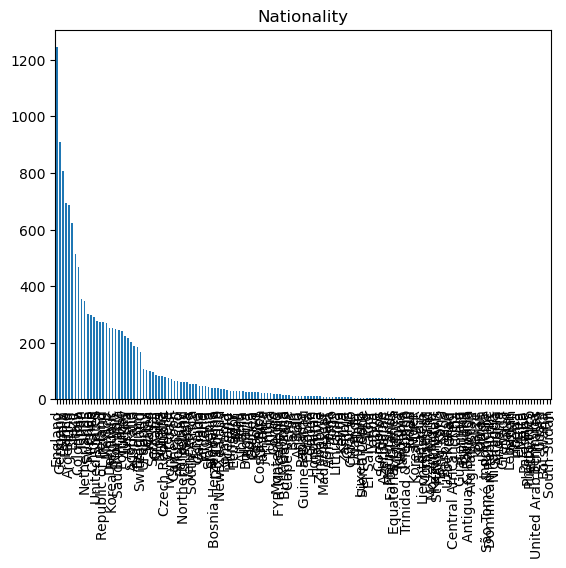

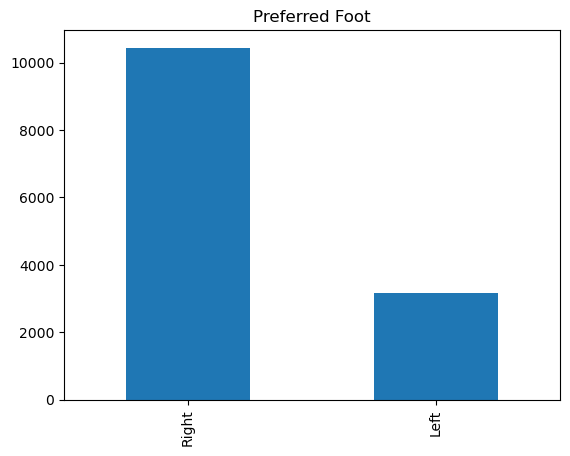

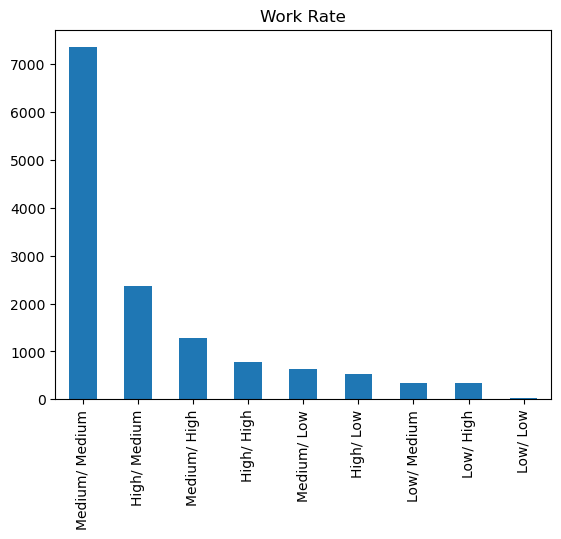

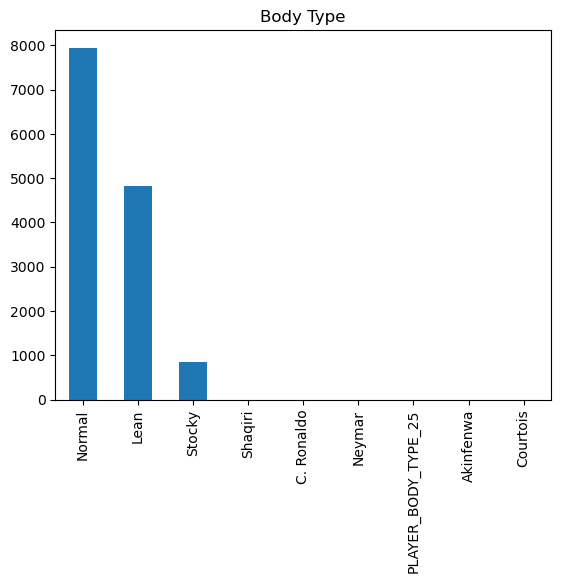

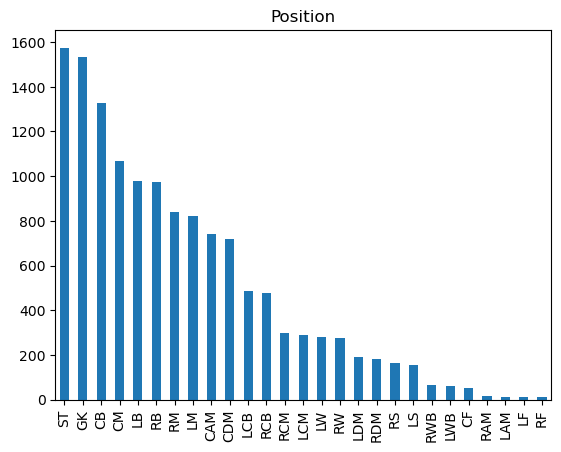

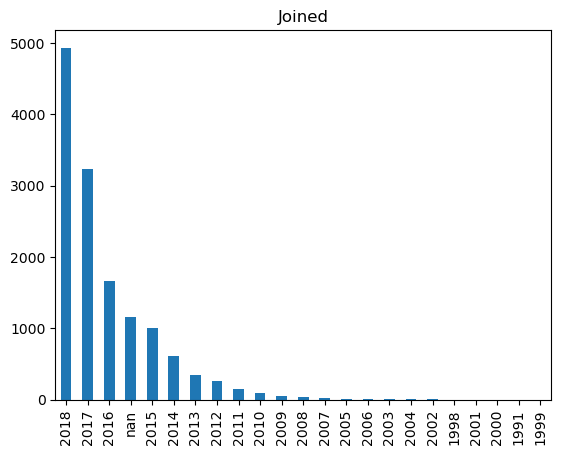

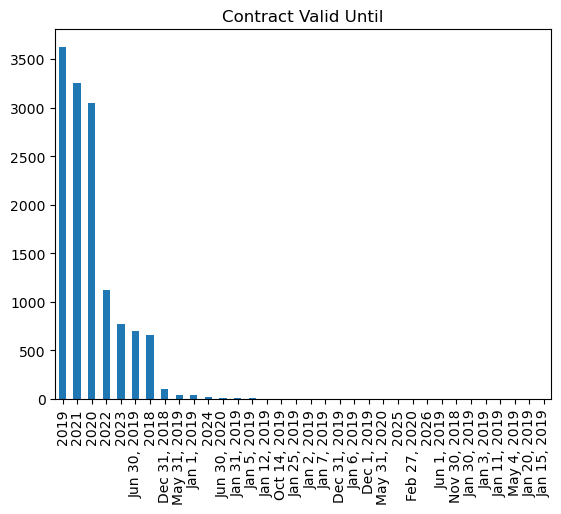

In [67]:
for i in categorical_df.columns:
    df[i].value_counts().plot(kind='bar', title=i)
    plt.show()

9. Generate pair plots for the following variables:
Overall, Value, Wage, International Reputation, Height, Weight, Release Clause


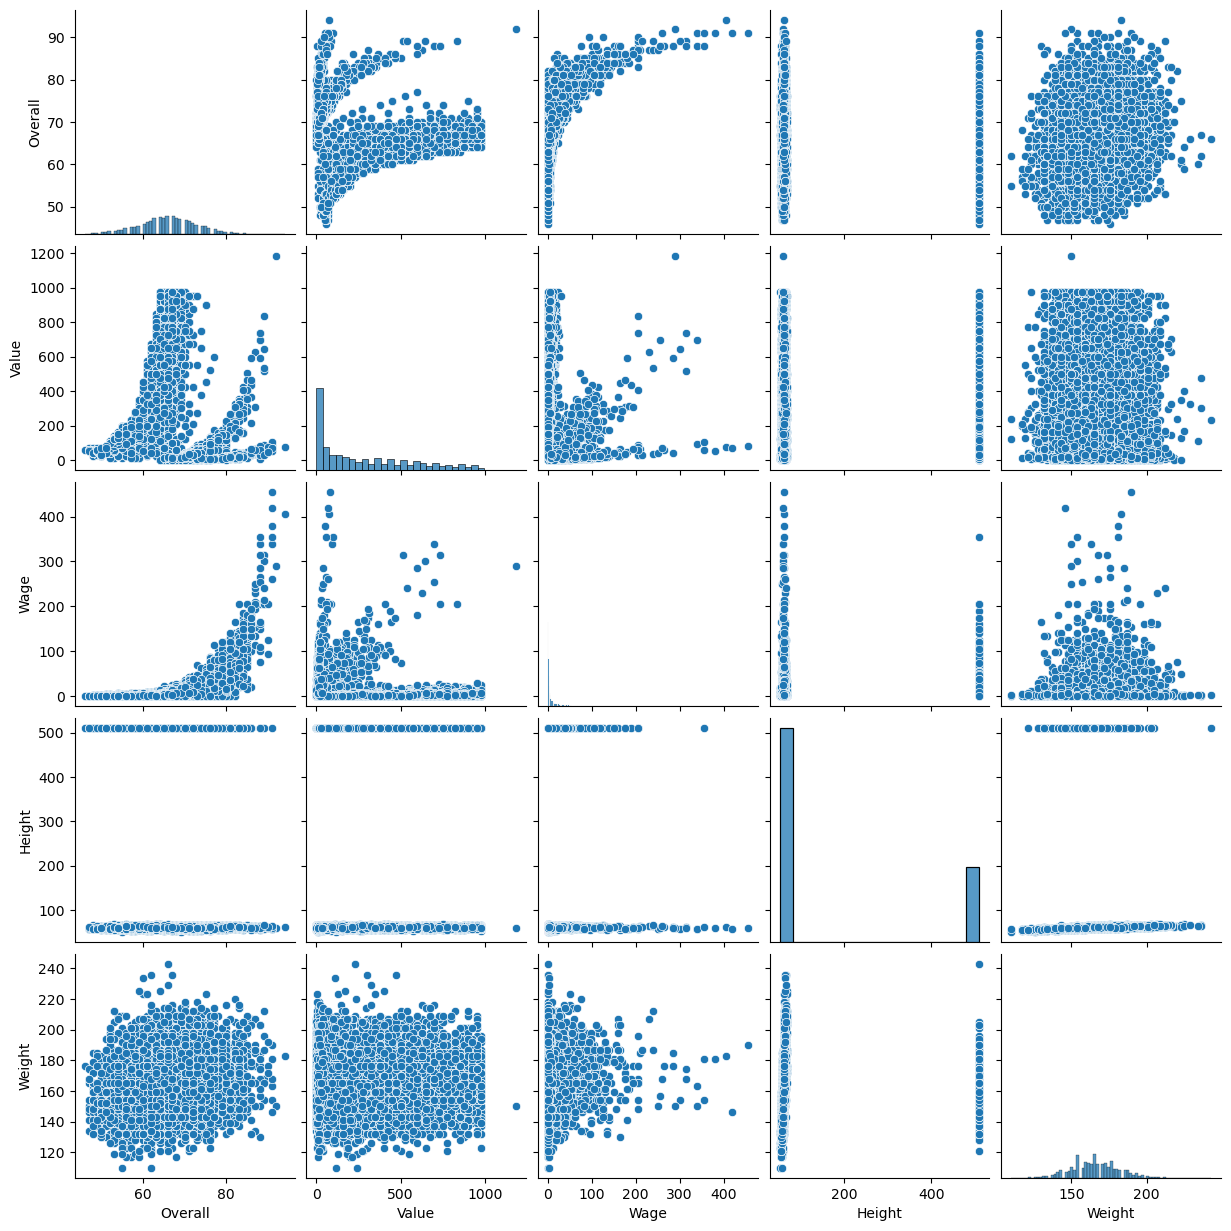

In [74]:
variables = ['Overall', 'Value', 'Wage', 'Height', 'Weight', 'Release Clause']
selected_variables_df = df[variables]
selected_variables_df = selected_variables_df.dropna()
sns.pairplot(selected_variables_df)
plt.show()

10. Generate a table containing the top 20 players ranked by Overall score and whose
contract expires in 2020
* What would the average wage for this set of players be?
* What is the average age?
*  Is there a correlation between the Overall rating and Value for these players? If Yes
what kind of relationship that the features have, also explain why this kind of relationship
could happen.

In [81]:
df1 = df[df['Contract Valid Until']=='2020']
df1.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,Work Rate,Body Type,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Release clause
4,243718,R. Koot,18,Netherlands,56,68,Fortuna Sittard,120.0,1.0,Right,Medium/ Medium,Normal,GK,2016,NaN,2020,61.0,176.0,11.0,6.0,13.0,19.0,9.0,12.0,10.0,10.0,18.0,14.0,30.0,19.0,25.0,48.0,44.0,17.0,64.0,20.0,45.0,5.0,25.0,11.0,4.0,30.0,15.0,39.0,11.0,14.0,12.0,59.0,55.0,59.0,55.0,56.0,€198K,198.0
5,245733,H. Weydandt,22,Germany,65,72,Hannover 96,775.0,8.0,Right,Medium/ Medium,Normal,ST,2018,NaN,2020,65.0,207.0,30.0,70.0,70.0,49.0,67.0,57.0,36.0,33.0,34.0,55.0,55.0,66.0,47.0,61.0,35.0,68.0,67.0,59.0,90.0,48.0,63.0,24.0,63.0,45.0,50.0,49.0,23.0,36.0,28.0,12.0,5.0,15.0,13.0,9.0,€1.6M,16.0
9,223175,O. Kocuk,22,Turkey,64,73,Bursaspor,525.0,2.0,Right,Medium/ Medium,Normal,GK,2011,NaN,2020,62.0,172.0,11.0,10.0,10.0,27.0,10.0,10.0,10.0,13.0,16.0,11.0,31.0,36.0,39.0,54.0,30.0,20.0,43.0,23.0,55.0,10.0,15.0,12.0,11.0,11.0,23.0,37.0,5.0,10.0,11.0,65.0,67.0,59.0,58.0,66.0,€1.2M,12.0
14,230890,B. Wilson,21,Australia,61,73,Perth Glory,450.0,1.0,Right,Medium/ Medium,Lean,CM,2016,NaN,2020,61.0,179.0,59.0,45.0,47.0,65.0,56.0,65.0,57.0,46.0,63.0,66.0,75.0,73.0,62.0,57.0,78.0,58.0,52.0,68.0,71.0,51.0,38.0,35.0,56.0,56.0,49.0,64.0,56.0,62.0,61.0,7.0,9.0,14.0,8.0,14.0,€653K,653.0
23,192838,E. Schelotto,29,Italy,73,73,Brighton & Hove Albion,3.0,34.0,Right,High/ Medium,Lean,RB,2017,NaN,2020,62.0,170.0,75.0,52.0,64.0,69.0,59.0,74.0,67.0,57.0,65.0,73.0,67.0,75.0,67.0,74.0,65.0,75.0,70.0,83.0,69.0,65.0,85.0,71.0,73.0,62.0,54.0,66.0,72.0,72.0,70.0,11.0,11.0,6.0,5.0,9.0,€5.7M,57.0


In [83]:
avg_wage = df['Wage'].mean()
print(f'The average wage of players whose contract ends in 2020 = {avg_wage:.2f}')

The average wage of players whose contract ends in 2020 = 9.65


In [84]:
avg_age = df['Age'].mean()
print(f'The average wage of players whose contract ends in 2020 = {avg_age:.2f}')

The average wage of players whose contract ends in 2020 = 25.08


In [90]:
correlation = df['Overall'].corr(df['Value'])
print(f'Correlation = {correlation}')

Correlation = -0.18152502553185618


There is no strong correlation between Overall and Value 

11. Generate tables containing the top 5 players by Overall rating for each unique position.

In [96]:
df_sorted = df.sort_values(by='Overall', ascending=False)

top_players_by_position = []

for position in df_sorted['Position'].unique():
    top_players_by_position.append(df_sorted[df_sorted['Position'] == position].head(5))

top_players_df = pd.concat(top_players_by_position)

top_players_df = top_players_df.reset_index(drop=True)

top_players_df


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,Work Rate,Body Type,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Release clause
0,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77.0,405.0,Right,High/ Low,C. Ronaldo,ST,2018,NaN,2022,62.0,183.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,1271.0
1,188545,R. Lewandowski,29,Poland,90,90,FC Bayern München,77.0,205.0,Right,High/ Medium,Normal,ST,2014,NaN,2021,60.0,176.0,62.0,91.0,85.0,83.0,89.0,85.0,77.0,86.0,65.0,89.0,77.0,78.0,78.0,90.0,78.0,88.0,84.0,78.0,84.0,84.0,80.0,39.0,91.0,77.0,88.0,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,€127.1M,1271.0
2,153079,S. Agüero,30,Argentina,89,89,Manchester City,645.0,300.0,Right,High/ Medium,Stocky,ST,2011,NaN,2021,58.0,154.0,70.0,93.0,77.0,81.0,85.0,89.0,82.0,73.0,64.0,89.0,88.0,80.0,86.0,90.0,91.0,88.0,81.0,76.0,73.0,83.0,65.0,24.0,92.0,83.0,83.0,90.0,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0,€119.3M,1193.0
3,202126,H. Kane,24,England,89,91,Tottenham Hotspur,835.0,205.0,Right,High/ High,Normal,ST,2010,NaN,2024,62.0,196.0,75.0,94.0,85.0,80.0,84.0,80.0,78.0,68.0,82.0,84.0,68.0,72.0,71.0,91.0,71.0,88.0,78.0,89.0,84.0,85.0,76.0,35.0,93.0,80.0,90.0,89.0,56.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0,€160.7M,1607.0
4,173731,G. Bale,28,Wales,88,88,Real Madrid,60.0,355.0,Left,High/ Medium,Lean,ST,2013,NaN,2022,61.0,181.0,87.0,86.0,84.0,85.0,85.0,87.0,90.0,87.0,80.0,85.0,94.0,95.0,82.0,85.0,65.0,92.0,87.0,75.0,80.0,91.0,65.0,59.0,85.0,79.0,76.0,86.0,54.0,55.0,52.0,15.0,15.0,11.0,5.0,6.0,€123M,123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,223682,Granell,29,Spain,79,79,Girona FC,12.0,37.0,Left,Medium/ Medium,Normal,LWB,2014,NaN,2021,59.0,154.0,73.0,74.0,55.0,83.0,56.0,76.0,80.0,76.0,79.0,80.0,65.0,60.0,71.0,72.0,77.0,73.0,66.0,69.0,64.0,81.0,73.0,74.0,74.0,78.0,68.0,69.0,55.0,75.0,65.0,6.0,13.0,13.0,14.0,14.0,€25.2M,252.0
131,210455,Jonny,24,Spain,79,83,Wolverhampton Wanderers,135.0,43.0,Right,High/ High,Normal,LWB,nan,Atlético Madrid,"Jun 30, 2019",57.0,154.0,77.0,34.0,70.0,73.0,44.0,73.0,60.0,54.0,59.0,76.0,77.0,78.0,72.0,71.0,78.0,66.0,75.0,83.0,64.0,45.0,82.0,80.0,53.0,55.0,46.0,70.0,77.0,79.0,82.0,7.0,10.0,12.0,10.0,6.0,NaN,134.0
132,214026,J. Mojica,25,Colombia,78,81,Girona FC,105.0,28.0,Left,High/ Medium,Lean,LWB,2018,NaN,2022,61.0,161.0,79.0,62.0,55.0,78.0,43.0,78.0,74.0,68.0,70.0,79.0,89.0,90.0,74.0,70.0,61.0,80.0,73.0,70.0,70.0,61.0,75.0,72.0,69.0,65.0,67.0,69.0,67.0,78.0,79.0,13.0,8.0,14.0,9.0,15.0,€22.8M,228.0
133,189390,B. Oczipka,29,Germany,77,77,FC Schalke 04,65.0,30.0,Left,High/ Medium,Normal,LWB,2017,NaN,2020,61.0,187.0,81.0,50.0,68.0,77.0,47.0,73.0,61.0,70.0,74.0,74.0,66.0,76.0,65.0,76.0,62.0,75.0,75.0,79.0,77.0,64.0,76.0,74.0,66.0,60.0,70.0,74.0,74.0,79.0,78.0,12.0,14.0,7.0,6.0,10.0,€11.1M,111.0


In [98]:
duplicate_players = top_players_df[top_players_df.duplicated(subset='ID', keep=False)]

if not duplicate_players.empty:
    print("Players appearing in more than one table:")
    print(duplicate_players)
else:
    print("No players appearing in more than one table.")


No players appearing in more than one table.


In [99]:
average_wage_by_position = top_players_df.groupby('Position')['Wage'].mean()

print("\nAverage wage for the top 5 players in each position:")
print(average_wage_by_position)



Average wage for the top 5 players in each position:
Position
CAM    168.0
CB     139.6
CDM    173.8
CF      38.6
CM     115.8
GK     164.2
LAM     81.8
LB     175.6
LCB    158.2
LCM    102.2
LDM    105.2
LF     123.2
LM     147.6
LS     114.2
LW     261.0
LWB     32.8
RAM     46.6
RB     133.8
RCB    219.0
RCM    218.6
RDM    105.0
RF      38.6
RM     130.0
RS     129.4
RW     176.0
RWB     41.2
ST     294.0
Name: Wage, dtype: float64


## Statistical Analysis:
1. Test statistically whether the Left-hand player’s overall rating is higher than the
Right-hand overall score. Alpha = 0.05
Before checking the test, Kindly make sure data is normally distributed.


In [101]:
import scipy.stats as stats


left_hand_players = df[df['Preferred Foot'] == 'Left']['Overall']
right_hand_players = df[df['Preferred Foot'] == 'Right']['Overall']

left_hand_normality_test = stats.shapiro(left_hand_players)
right_hand_normality_test = stats.shapiro(right_hand_players)

if left_hand_normality_test.pvalue > 0.05 and right_hand_normality_test.pvalue > 0.05:
    print("Data is normally distributed.")
else:
    print("Data is not normally distributed")

u_statistic, p_value = stats.mannwhitneyu(left_hand_players, right_hand_players, alternative='greater')

if p_value < 0.05:
    print("The overall rating of left-hand players is statistically higher than right-hand players.")
else:
    print("There is no statistically significant difference in the overall rating between left-hand and right-hand players.")


Data is not normally distributed
The overall rating of left-hand players is statistically higher than right-hand players.


2. Does the age factor affect the player’s potential? Check the claim that the players who
are greater than 35, their potential will be lesser than those whose age is less than 35.
Alpha = 0.05


In [106]:
players_greater_than_35 = df[df['Age'] > 35]['Potential']
players_less_than_35 = df[df['Age'] < 35]['Potential']

shapiro_test_greater_35 = stats.shapiro(players_greater_than_35)
shapiro_test_less_35 = stats.shapiro(players_less_than_35)

levene_test = stats.levene(players_greater_than_35, players_less_than_35)

if (shapiro_test_greater_35.pvalue > 0.05 and shapiro_test_less_35.pvalue > 0.05) and levene_test.pvalue > 0.05:
    print("The data meets the assumptions for the t-test")
else:
    print("The data does not meet the assumptions for the t-test")

u_statistic, p_value = stats.mannwhitneyu(players_greater_than_35, players_less_than_35, alternative='greater')

if p_value < 0.05:
    print("The age factor affects the player's potential.")
else:
    print("There is no statistically significant difference in potential between players greater than 35 and those whose age is less than 35.")


The data does not meet the assumptions for the t-test
There is no statistically significant difference in potential between players greater than 35 and those whose age is less than 35.


3. Use the statistical test to check the relationship between the Preferred Foot and Position
with the 99% confident interval.

In [107]:
contingency_table = pd.crosstab(df['Preferred Foot'], df['Position'])

chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

confidence_level = 0.99
alpha = 1 - confidence_level
critical_value = stats.chi2.ppf(1 - alpha, dof)
margin_of_error = critical_value * (chi2_stat / chi2_stat.sum())

if p_value < alpha:
    print("There is a significant relationship between Preferred Foot and Position.")
else:
    print("There is no significant relationship between Preferred Foot and Position.")

print(f"99% Confidence Interval: [{chi2_stat - margin_of_error}, {chi2_stat + margin_of_error}]")


There is a significant relationship between Preferred Foot and Position.
99% Confidence Interval: [3334.7658598792796, 3426.0492252118456]


4. Does the International Reputation cause a significant effect on players' Wages?
Check the claim with a 0.04 significance level. Check the Normality of data before the
actual test.


In [125]:
shapiro_test = stats.shapiro(df['Wage'])

if shapiro_test.pvalue > 0.05:
    print("Wage data is normally distributed")
else:
    print("Wage data is not normally distributed")

correlation, p_value = stats.spearmanr(df['International Reputation'], df['Wage'])

alpha = 0.04

if p_value < alpha:
    print("The International Reputation has a significant effect on players Wages.")
else:
    print("There is no significant effect of International Reputation on players Wages.")


Wage data is not normally distributed
There is no significant effect of International Reputation on players Wages.


5. Check the claim that the median wages of under top 20 players are lesser than or equal
to 25000. Test the claim with a 0.05 % significance level. Check the data is normally
distributed or not before the testing the claim statistically.

In [127]:
shapiro_test = stats.shapiro(df['Wage'])

if shapiro_test.pvalue > 0.05:
    print("Wage data is normally distributed.")
else:
    print("Wage data is not normally distributed.")

top_20_wages = df['Wage'].nlargest(20)

median_wage_claim = 25000
u_statistic, p_value = stats.mannwhitneyu(top_20_wages, [median_wage_claim] * len(top_20_wages), alternative='less')

alpha = 0.05

if p_value < alpha:
    print("The claim is supported. The median wages of the top 20 players are less than or equal to 25000.")
else:
    print("The claim is not supported. The median wages of the top 20 players are greater than 25000.")

Wage data is not normally distributed.
The claim is supported. The median wages of the top 20 players are less than or equal to 25000.
